## 自己撰寫自己的loss function
簡介
- loss function 在機器學習占據重要的位置，是以判斷模型學習的基礎，高度影響模型學習的方向，在其他領域也常常用到，在可以將問題轉化成最佳化問題的情況下，通常都是極小化損失函數。
- 在最佳化損失函數的途中，會不斷改變模型參數，使得模型可以預測得更好(損失更小)。
分類
- 回歸問題一般使用MSE、MAE當作損失函數，但可以從SBERT(Triplet Objective Function)知道，透過損失函數的改變，可以學習到目的截然不同的模型，即便模型結構相同，因此，損失函數的理解必不可少。
- 分類問題一般使用crossentropy。

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

在[keras](https://keras.io/api/losses/)中，只要寫一個function，可以接受y_true, y_pred，並且return 陣列的 losses(一個batch裡面就有一個loss value) 就可以傳遞進 compile 函數中進行計算。 而 sample_weight函數會自動被支持。

In [2]:
# 簡單建造一個回歸模型，並且自己寫一個MSE與官方版本比較。
# 簡化就不正規化了。

# 資料
X = np.array(range(-5000, 5000), dtype='float').reshape(-1, 1)
y = X**2 + X + 3

print(X.shape, y.shape)

(10000, 1) (10000, 1)


In [3]:
for x1, y1 in zip(X, y):
    print(x1, y1)
    break

[-5000.] [24995003.]


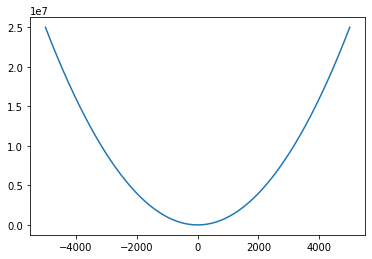

In [4]:
plt.plot(X, y)

In [5]:
def get_model(X):
    """
        簡單建造一個MLP模型
    """
    inputs = keras.Input(shape=X.shape[1], dtype='float32')
    hidden = keras.layers.Dense(units=32, activation='relu')(inputs)
    hidden = keras.layers.Dense(units=16, activation='relu')(hidden)
    outputs = keras.layers.Dense(units=1)(hidden)
    
    return keras.Model(inputs, outputs)


model_own = get_model(X)
model_own.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [6]:
# 自己撰寫MSE functino

def loss_fn(y_true, y_pred):
    """MSE"""
    square_diff = tf.square(y_true-y_pred)      # list of (y-y-hat)**2
    return tf.reduce_mean(square_diff, axis=-1) # sum

In [7]:
model_own.compile(optimizer='adam', loss=loss_fn)
model_own.fit(X, y, batch_size=32, epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 888us/step - loss: 124689250779136.0000
Epoch 2/5
313/313 [==============================] - 0s 814us/step - loss: 121231961489408.0000
Epoch 3/5
313/313 [==============================] - 0s 936us/step - loss: 110180104667136.0000
Epoch 4/5
313/313 [==============================] - 0s 801us/step - loss: 90527399673856.0000
Epoch 5/5
313/313 [==============================] - 0s 885us/step - loss: 65290276700160.0000


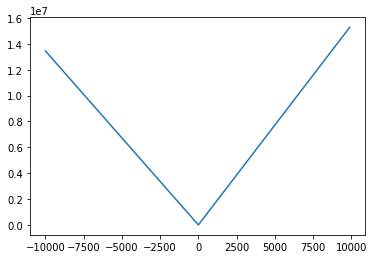

In [8]:
# 隨機產生新的樣本去產生預測

x_test = np.array(range(-10000, 10000, 100))
y_test = x_test ** 2 + x_test + 3


y_pred_own = model_own.predict(x_test)
plt.plot(x_test, y_pred_own)

In [9]:
model_keras = get_model(X)
model_keras.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                64        
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 609
Trainable params: 609
Non-trainable params: 0
_________________________________________________________________


In [10]:
model_keras.compile(optimizer='adam', loss='mse')
model_keras.fit(X, y, batch_size=32, epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 930us/step - loss: 124747383832576.0000
Epoch 2/5
313/313 [==============================] - 0s 958us/step - loss: 121413650350080.0000
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 110384191111168.0000
Epoch 4/5
313/313 [==============================] - 0s 990us/step - loss: 90712947294208.0000
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 66038171435008.0000


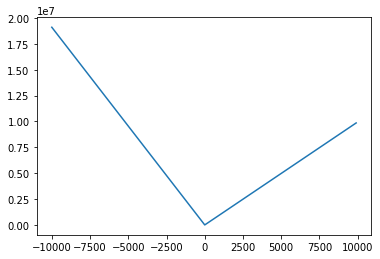

In [11]:
y_pred_keras = model_keras.predict(x_test)
plt.plot(x_test, y_pred_keras)

> 學習的效果一致，自己寫出的可用。